In [5]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'  # carpeta donde se encuentran los datasets
else:
    FUENTES_DIR = '../Fuentes/' # carpeta LOCAL donde se encuentran los scripts
    DATOS_DIR   = '../Datos/' # carpeta LOCAL donde se encuentran los datasets

In [6]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
from sklearn import preprocessing

def openFile(nomArch, sep=None):
    file = DATOS_DIR + nomArch
    #-- detectando la codificación de caracteres usada ----
    with open(file, 'rb') as f:
        result = chardet.detect(f.read()) 
    return pd.read_csv(file, encoding=result['encoding'], sep=sep, engine='python') # or readline if the file is large

### Ejercicio 1

In [7]:
df = openFile('hawks.csv')

In [8]:
print(df.head())
print("============")
print(df.describe())
print("============")
print(df.isnull().sum())  # para ver si hay datos nulos

    Año Especie   Ala   Peso  Cola  Hallux
0  1994      RT  2770   9400   218     304
1  1997      RT  3730   9140   221     304
2  2000      RT  3790  10000   217     322
3  2000      RT  3920  11850   229     330
4  2002      RT  3650  11250   213     293
               Año          Ala          Peso        Cola       Hallux
count   893.000000   893.000000    893.000000  893.000000   893.000000
mean   1998.285554  3161.178052   7722.609183  198.954087   291.771557
std       3.446286   952.791335   4626.197218   36.807936   321.324050
min    1992.000000   372.000000    560.000000  119.000000    95.000000
25%    1995.000000  2020.000000   1850.000000  160.000000   152.000000
50%    1999.000000  3700.000000   9700.000000  214.000000   295.000000
75%    2001.000000  3900.000000  11200.000000  225.000000   315.000000
max    2003.000000  4800.000000  20300.000000  288.000000  3414.000000
Año        0
Especie    0
Ala        0
Peso       0
Cola       0
Hallux     0
dtype: int64


In [9]:
# Numerización one-hot de la columna "Especie"
df = pd.get_dummies(df, columns=["Especie"])*1

In [10]:
# Calcule la correlación lineal entre los atributos Ala y Cola. Indique la intensidad de la correlación (no hay
# correlación/débil/fuerte) y el tipo (positiva/negativa)

correlacion = df["Ala"].corr(df["Cola"])
print(correlacion)

abs_correlacion = abs(correlacion)

if abs_correlacion == 0:
    intensidad = "no hay correlación"
elif abs_correlacion < 0.5:
    intensidad = "débil"
else:
    intensidad = "fuerte"

if correlacion > 0:
    tipo = "positiva"
else:
    tipo = "negativa"

print(f"Correlación: {correlacion}, Intensidad: {intensidad}, Tipo: {tipo}")



0.8998883674343939
Correlación: 0.8998883674343939, Intensidad: fuerte, Tipo: positiva


In [11]:
normalizador = preprocessing.StandardScaler()

df_estandarizado = df.copy()
df_estandarizado["Hallux"] = normalizador.fit_transform(df[["Hallux"]])

describe = df_estandarizado["Hallux"].describe()
print("Media:", describe["mean"])
print("Desviación estándar:", describe["std"])
print("Mínimo:", describe["min"])
print("Máximo:", describe["max"])
print("Q1:", describe["25%"])
print("Q2 (mediana):", describe["50%"])
print("Q3:", describe["75%"])
print("Rango intercuartílico (IQR):", describe["75%"] - describe["25%"])
print("Bigote superior:", describe["75%"] + 1.5 * (describe["75%"] - describe["25%"]))
print("Bigote inferior:", describe["25%"] - 1.5 * (describe["75%"] - describe["25%"]))


Media: -3.182722220649945e-17
Desviación estándar: 1.0005603811031016
Mínimo: -0.6127204722295961
Máximo: 9.722204366378598
Q1: -0.43523004866808146
Q2 (mediana): 0.010052943775718458
Q3: 0.07233028537624991
Rango intercuartílico (IQR): 0.5075603340443313
Bigote superior: 0.8336707864427468
Bigote inferior: -1.1965705497345784


Compare los valores obtenidos e indique el valor de verdad de las siguientes afirmaciones:

### I. El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos. 
Falso, el valor de Q2(0.01005) no es similar al de la media(-3.182722)


### II. El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media. 
Sí, por que la media es -3 y el desvío 1, entonces -3+9*1= 6

### III. Un hallux que mida más de 600 mm es considerado atípico extremo. 
No

### IV. Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo. 


V. En un gavilán es atípico que su hallux mida menos de 100 mm.

In [12]:
media = df["Hallux"].mean()
desviacion_estandar = df["Hallux"].std()

num = 600
num_estandarizado = (num - media) / desviacion_estandar

# Cálculo de si es un valor extremo en base a 3 veces el IQR
es_extremo = num_estandarizado < describe["25%"] - 3 * (describe["75%"] - describe["25%"]) or num_estandarizado > describe["75%"] + 3 * (describe["75%"] - describe["25%"])
print("Número estandarizado:", num_estandarizado) # Imprime 599.663.....
print("¿Es un valor extremo?", es_extremo)


Número estandarizado: 0.9592448604907569
¿Es un valor extremo? False


In [13]:
media = df_estandarizado["Hallux"].mean()
desviacion_estandar = df_estandarizado["Hallux"].std()
num_estandarizado = 2

es_extremo = num_estandarizado < describe["25%"] - 3 * (describe["75%"] - describe["25%"]) or num_estandarizado > describe["75%"] + 3 * (describe["75%"] - describe["25%"])
print("Número estandarizado:", num_estandarizado) # Imprime 2
print("¿Es un valor extremo?", es_extremo)

Número estandarizado: 2
¿Es un valor extremo? True


### Ejercicio 2

In [31]:
df = openFile('globos.csv')

# Numerización de las columnas
df["Color"] = df["Color"].map({'Rojo': 1, 'Amarillo': 0}).astype('Int64')
df["Se_estira?"] = df["Se_estira?"].map({'Si': 1, 'No': 0}).astype('Int64')
df["Edad"] = df["Edad"].map({'Adulto': 1, 'Nene': 0}).astype('Int64')
df["Tamanio"] = df["Tamanio"].map({'Grande': 1, 'Mediano': 0.5, 'Chico': 0})

df["Inflado?"] = df["Inflado?"].map({'Si': 1, 'No': 0}).astype('Int64')

In [ ]:
def ejecutar_perceptron_manual (configuracion):
    suma_ponderada = 0

    suma_ponderada += df["Color"] * configuracion["w_color"]
    suma_ponderada += df["Se_estira?"] * configuracion["w_se_estira"]
    suma_ponderada += df["Edad"] * configuracion["w_edad"]
    suma_ponderada += df["Tamanio"] * configuracion["w_tamanio"]
    suma_ponderada += configuracion["bias"]

    # Función de activación escalón (umbral en 0)
    T = suma_ponderada.apply(lambda x: 1 if x >= 0 else 0)
    Y = df["Inflado?"]

    salida = (sum(T == Y) / len(Y)) * 100  # precisión en porcentaje

    return salida

In [40]:
# Configuraciones del perceprón
configuraciones = { 1: {'w_color': 0.05, 'w_tamanio': 0.006, 'w_se_estira': -0.068, 'w_edad': -0.047, 'bias': 0.005},
                    2: {'w_color': -0.494, 'w_tamanio': -0.003, 'w_se_estira': 0.722, 'w_edad': 0.489, 'bias': -0.4943},
                    3: {'w_color': 0.06, 'w_tamanio': 0.004, 'w_se_estira': 0.1278, 'w_edad': 0.021, 'bias': -0.1132},
                    4: {'w_color': 0.296, 'w_tamanio': 0.026, 'w_se_estira': -0.576, 'w_edad': -0.287, 'bias': 0.371},
                    5: {'w_color': 0.994, 'w_tamanio': 0.006, 'w_se_estira': -1.466, 'w_edad': -0.989, 'bias': 0.988},
                }

# Cálculo de las salidas del perceptrón para cada configuración
for index, config in configuraciones.items():
    salida = ejecutar_perceptron_manual(config)
    print("Salida del perceptrón", index, ": %", salida)

Salida del perceptrón 1 : % 25.0
Salida del perceptrón 2 : % 100.0
Salida del perceptrón 3 : % 87.5
Salida del perceptrón 4 : % 0.0
Salida del perceptrón 5 : % 6.25


a) El perceptrón que clasificó correctamente todos los datos es el de la segunda configuración

b) El peor es el cuarto

### Ejercicio 3

### Ejercicio 4

In [15]:
def process(df, dummie):
    df_estandarizado = df.copy()
    df_estandarizado= df_estandarizado[df_estandarizado["Drug"] != 'drugY']

    df_estandarizado["Age"] = normalizador.fit_transform(df_estandarizado[["Age"]])

    # Convertimos Sex a numérico
    df_estandarizado["Sex"] = df_estandarizado["Sex"].map({'F': 1, 'M': 0})

    if dummie:
        # Aplicamos get_dummies DESPUÉS de las otras transformaciones
        # y sobre el dataframe ya transformado
        df_estandarizado[["BP_HIGH", "BP_NORMAL", "BP_LOW", "Cholesterol_HIGH", "Cholesterol_NORMAL"]] = pd.get_dummies(df_estandarizado[["BP", "Cholesterol"]])
        # Convertimos las columnas booleanas a enteros
        for col in df_estandarizado.columns:
            if df_estandarizado[col].dtype == bool:
                df_estandarizado[col] = df_estandarizado[col].astype(int)
        df_estandarizado = df_estandarizado.drop(columns=["BP", "Cholesterol"])
    else:
        df_estandarizado["BP"] = df_estandarizado["BP"].map({'HIGH': 2, 'NORMAL': 1, 'LOW': 0})
        df_estandarizado["Cholesterol"] = df_estandarizado["Cholesterol"].map({'HIGH': 1, 'NORMAL': 0})

    # Normalizamos Na y K
    df_estandarizado["Na"] = normalizador.fit_transform(df_estandarizado[["Na"]])
    df_estandarizado["K"] = normalizador.fit_transform(df_estandarizado[["K"]])


    # Extraemos X e Y
    Y = (df_estandarizado["Drug"] == 'drugY')*1  # 1 Si es drugY, 0 en caso contrario
    X = df_estandarizado.drop(columns=["Drug"]).values

    return df_estandarizado, X, Y


In [16]:
import sys
sys.path.append(FUENTES_DIR)
from ClassPerceptron import Perceptron
import pandas as pd

ppn = Perceptron(alpha=0.01, n_iter=40, draw=1, random_state=1)
df = openFile('drugs_train.csv')
df_test = openFile('drugs_test.csv')

dummie = 1

df_estandarizado, X, Y = process(df, dummie)

ppn.fit(X, Y)

df_estandarizado_test, X, T = process(df_test, dummie)

Y = ppn.predict(X)

aciertos = sum(Y == T)  
print("aciertos = ", aciertos)

nAciertos = sum(Y==T)
print("%% de aciertos = %.2f %%" %(100*nAciertos/X.shape[0]))

aciertos =  22
% de aciertos = 100.00 %


Sin el dummie (Mapeando con numéricos ordinales): aciertos =  17
% de aciertos = 94.44 %.

Con el dummie (Una columna para BP_HIG, BP_LOW, etc.): aciertos =  18
% de aciertos = 100.00 %. 

¿Por qué es mejor el uso de OneHot Encoding (dummie)?

#### Diferencia entre mapeo ordinal y dummies

Mapeo ordinal (ej. HIGH=2, NORMAL=1, LOW=0):

Estás imponiendo un orden numérico artificial.

El modelo interpretará que HIGH está “más cerca” de NORMAL que de LOW, lo cual no necesariamente refleja la realidad médica.

Ejemplo: la presión "HIGH" no es simplemente "dos veces" la de "LOW".

Dummies (one-hot encoding):

Cada categoría se convierte en una variable independiente binaria (ej. BP_HIGH=1 o 0).

El perceptrón ya no necesita “adivinar” un orden, simplemente asigna un peso distinto a cada categoría.

Esto elimina la falsa suposición de que hay un orden numérico entre los valores categóricos

In [17]:
def normalizador(df, normalizador=None):
    df_normalizado = df.copy()

    # Convertimos a numérico
    df_normalizado["Sex"] = df_normalizado["Sex"].map({'F': 1, 'M': 0})
    df_normalizado["BP"] = df_normalizado["BP"].map({'HIGH': 2, 'NORMAL': 1, 'LOW': 0})
    df_normalizado["Cholesterol"] = df_normalizado["Cholesterol"].map({'HIGH': 1, 'NORMAL': 0})
    df_normalizado["Drug"] = (df_normalizado["Drug"]=="drugY")*1
    print(df_normalizado.head())

    if normalizador:
        df_normalizado["BP"] = normalizador.fit_transform(df_normalizado[["BP"]])
        df_normalizado["Cholesterol"] = normalizador.fit_transform(df_normalizado[["Cholesterol"]])
        df_normalizado["Age"] = normalizador.fit_transform(df_normalizado[["Age"]])
        df_normalizado["Na"] = normalizador.fit_transform(df_normalizado[["Na"]])
        df_normalizado["K"] = normalizador.fit_transform(df_normalizado[["K"]])

    return df_normalizado


#### DF Sin normalizar:

In [18]:
df = openFile('drugs_train.csv')
df_test = openFile('drugs_test.csv')

ppn = Perceptron(alpha=0.01, n_iter=40, draw=1, random_state=1)

df_train_sin_estandarizar = normalizador(df)
df_test_sin_estandarizar = normalizador(df_test)

# Extraemos X e Y
Y = df_train_sin_estandarizar["Drug"]*1  # 1 Si es drugY, 0 en caso contrario
X = df_train_sin_estandarizar.drop(columns=["Drug"]).values

print(Y.head())

ppn.fit(X, Y)

Y_Test = df_test_sin_estandarizar["Drug"].values  # 1 Si es drugY, 0 en caso contrario
X_Test = df_test_sin_estandarizar.drop(columns=["Drug"]).values

T = ppn.predict(X_Test)

aciertos = sum(Y_Test == T)  
print("aciertos = ", aciertos)

nAciertos = sum(Y_Test==T)
print("%% de aciertos = %.2f %%" %(100*nAciertos/X_Test.shape[0]))


   Age  Sex  BP  Cholesterol        Na         K  Drug
0   16    0   0            1  0.743021  0.061886     0
1   42    1   2            1  0.533228  0.025348     1
2   33    1   0            1  0.858387  0.025634     1
3   47    0   0            1  0.697269  0.068944     0
4   56    1   2            1  0.750962  0.029571     1
   Age  Sex  BP  Cholesterol        Na         K  Drug
0   47    1   0            1  0.539774  0.053620     0
1   49    0   0            0  0.625889  0.056828     0
2   50    0   2            1  0.518285  0.069193     0
3   32    1   1            1  0.549375  0.073474     0
4   40    0   2            1  0.557133  0.020022     1
0    0
1    1
2    1
3    0
4    1
Name: Drug, dtype: int64
aciertos =  18
% de aciertos = 45.00 %


#### DF Normalizado con normalización lineal

In [19]:
norm = preprocessing.MinMaxScaler()

df_train_sin_estandarizar = normalizador(df, norm)
df_test_sin_estandarizar = normalizador(df_test, norm)

# Extraemos X e Y
Y = df_train_sin_estandarizar["Drug"]*1  # 1 Si es drugY, 0 en caso contrario
X = df_train_sin_estandarizar.drop(columns=["Drug"]).values

print(Y.head())

ppn.fit(X, Y)

Y_Test = df_test_sin_estandarizar["Drug"].values  # 1 Si es drugY, 0 en caso contrario
X_Test = df_test_sin_estandarizar.drop(columns=["Drug"]).values

T = ppn.predict(X_Test)

aciertos = sum(Y_Test == T)  
print("aciertos = ", aciertos)

nAciertos = sum(Y_Test==T)
print("%% de aciertos = %.2f %%" %(100*nAciertos/X_Test.shape[0]))


   Age  Sex  BP  Cholesterol        Na         K  Drug
0   16    0   0            1  0.743021  0.061886     0
1   42    1   2            1  0.533228  0.025348     1
2   33    1   0            1  0.858387  0.025634     1
3   47    0   0            1  0.697269  0.068944     0
4   56    1   2            1  0.750962  0.029571     1
   Age  Sex  BP  Cholesterol        Na         K  Drug
0   47    1   0            1  0.539774  0.053620     0
1   49    0   0            0  0.625889  0.056828     0
2   50    0   2            1  0.518285  0.069193     0
3   32    1   1            1  0.549375  0.073474     0
4   40    0   2            1  0.557133  0.020022     1
0    0
1    1
2    1
3    0
4    1
Name: Drug, dtype: int64
aciertos =  39
% de aciertos = 97.50 %


DF Normalizado con normalización de media y desvío

In [20]:
norm = preprocessing.StandardScaler()

df_train_sin_estandarizar = normalizador(df, norm)
df_test_sin_estandarizar = normalizador(df_test, norm)

# Extraemos X e Y
Y = df_train_sin_estandarizar["Drug"]*1  # 1 Si es drugY, 0 en caso contrario
X = df_train_sin_estandarizar.drop(columns=["Drug"]).values

print(Y.head())

ppn.fit(X, Y)

Y_Test = df_test_sin_estandarizar["Drug"].values  # 1 Si es drugY, 0 en caso contrario
X_Test = df_test_sin_estandarizar.drop(columns=["Drug"]).values

T = ppn.predict(X_Test)

print(T)

aciertos = sum(Y_Test == T)  
print("aciertos = ", aciertos)

nAciertos = sum(Y_Test==T)
print("%% de aciertos = %.2f %%" %(100*nAciertos/X_Test.shape[0]))


   Age  Sex  BP  Cholesterol        Na         K  Drug
0   16    0   0            1  0.743021  0.061886     0
1   42    1   2            1  0.533228  0.025348     1
2   33    1   0            1  0.858387  0.025634     1
3   47    0   0            1  0.697269  0.068944     0
4   56    1   2            1  0.750962  0.029571     1
   Age  Sex  BP  Cholesterol        Na         K  Drug
0   47    1   0            1  0.539774  0.053620     0
1   49    0   0            0  0.625889  0.056828     0
2   50    0   2            1  0.518285  0.069193     0
3   32    1   1            1  0.549375  0.073474     0
4   40    0   2            1  0.557133  0.020022     1
0    0
1    1
2    1
3    0
4    1
Name: Drug, dtype: int64
[0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1
 0 1 1]
aciertos =  37
% de aciertos = 92.50 %


### Ejercicio 5

In [21]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Cargar datos
df = openFile('semillas.csv')
print("Clases únicas:", df['Clase'].unique())
print("Distribución de clases:")
print(df['Clase'].value_counts())

# Preparar datos
X = df.drop(columns=['Clase']).values
y = df['Clase'].values

# Normalizar datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar perceptrones para cada clase (One-vs-Rest)
clases = df['Clase'].unique()
resultados = {}

for clase in clases:
    print(f"\n=== Entrenando perceptrón para detectar '{clase}' ===")
    
    # Crear etiquetas binarias: 1 para la clase actual, 0 para las demás
    y_binary = (y == clase).astype(int)
    
    # Entrenar perceptrón
    ppn = Perceptron(alpha=0.05, max_iter=200)
    ppn.fit(X_scaled, y_binary)
    
    # Hacer predicciones
    y_pred = ppn.predict(X_scaled)
    
    # Calcular precisión
    accuracy = accuracy_score(y_binary, y_pred)
    
    print(f"Precisión para '{clase}': {accuracy:.2%}")
    
    # Análisis detallado
    true_positives = np.sum((y_binary == 1) & (y_pred == 1))
    false_positives = np.sum((y_binary == 0) & (y_pred == 1))
    false_negatives = np.sum((y_binary == 1) & (y_pred == 0))
    true_negatives = np.sum((y_binary == 0) & (y_pred == 0))
    
    print(f"Verdaderos positivos: {true_positives}")
    print(f"Falsos positivos: {false_positives}")
    print(f"Falsos negativos: {false_negatives}")
    print(f"Verdaderos negativos: {true_negatives}")
    
    # Mostrar ejemplos clasificados correctamente
    ejemplos_correctos = df[y_binary == y_pred]
    ejemplos_clase_actual = ejemplos_correctos[ejemplos_correctos['Clase'] == clase]
    
    print(f"Ejemplos de '{clase}' clasificados correctamente: {len(ejemplos_clase_actual)}")
    print(f"Total de ejemplos de '{clase}': {np.sum(y == clase)}")
    
    resultados[clase] = {
        'accuracy': accuracy,
        'ejemplos_correctos_clase': len(ejemplos_clase_actual),
        'total_clase': np.sum(y == clase),
        'perceptron': ppn
    }

print("\n=== RESUMEN FINAL ===")
for clase, resultado in resultados.items():
    print(f"{clase}: Precisión = {resultado['accuracy']:.2%}")
    if resultado['accuracy'] == 1.0:
        print(f"*** {clase} puede ser reconocido con 100% de precisión ***")

# Encontrar la clase que se puede separar linealmente con 100% de precisión
clase_perfecta = None
for clase, resultado in resultados.items():
    if resultado['accuracy'] == 1.0:
        clase_perfecta = clase
        break

if clase_perfecta:
    print(f"\nLa semilla que el perceptrón puede reconocer correctamente es: {clase_perfecta}")
else:
    print("\nNinguna clase puede ser reconocida con 100% de precisión usando un perceptrón simple")
    print("Mejores resultados:")
    for clase, resultado in sorted(resultados.items(), key=lambda x: x[1]['accuracy'], reverse=True):
        print(f"  {clase}: {resultado['accuracy']:.2%}")

Clases únicas: ['Tipo1' 'Tipo2' 'Tipo3']
Distribución de clases:
Clase
Tipo1    70
Tipo2    70
Tipo3    70
Name: count, dtype: int64

=== Entrenando perceptrón para detectar 'Tipo1' ===
Precisión para 'Tipo1': 91.90%
Verdaderos positivos: 57
Falsos positivos: 4
Falsos negativos: 13
Verdaderos negativos: 136
Ejemplos de 'Tipo1' clasificados correctamente: 57
Total de ejemplos de 'Tipo1': 70

=== Entrenando perceptrón para detectar 'Tipo2' ===
Precisión para 'Tipo2': 97.14%
Verdaderos positivos: 65
Falsos positivos: 1
Falsos negativos: 5
Verdaderos negativos: 139
Ejemplos de 'Tipo2' clasificados correctamente: 65
Total de ejemplos de 'Tipo2': 70

=== Entrenando perceptrón para detectar 'Tipo3' ===
Precisión para 'Tipo3': 93.81%
Verdaderos positivos: 58
Falsos positivos: 1
Falsos negativos: 12
Verdaderos negativos: 139
Ejemplos de 'Tipo3' clasificados correctamente: 58
Total de ejemplos de 'Tipo3': 70

=== RESUMEN FINAL ===
Tipo1: Precisión = 91.90%
Tipo2: Precisión = 97.14%
Tipo3: Precis

En el ejercicio 6 de la práctica 2 se trabajó con los ejemplos del archivo Zoo.csv Indique el valor de verdad de la siguiente afirmación:


- Si se normalizan linealmente los ejemplos del archivo Zoo.csv y se selecciona al azar una de las 7 especies, utilizando una velocidad de aprendizaje de 0.05 y un máximo de 200 iteraciones puede entrenarse un perceptrón para que separe correctamente los ejemplos de la clase seleccionada del resto.




In [22]:
df = openFile('zoo.csv')
df = df.drop(columns=["animal"])

# Normalizar todas las columnas usando MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])

# Mapeo manual y visual de las clases
df["Clase"] = df["Clase"].map({
    'Mamifero': 0,
    'Pez': 1,
    'Ave': 2,
    'Invertebrado': 3,
    'Insecto': 4,
    'Anfibio': 5,
    'Reptil': 6
})

X = df_normalizado.values
Y = (df["Clase"] == 0).astype(int).values  # 1 Si es Mamifero, 0 en caso contrario

ppn = Perceptron(alpha=0.05, max_iter=200)
ppn.fit(X, Y)

Y_pred = ppn.predict(X)
aciertos = sum(Y == Y_pred)  
print("aciertos = ", aciertos)
print("%% de aciertos = %.2f %%" %(100*aciertos/X.shape[0]))


aciertos =  101
% de aciertos = 100.00 %


En base a los ejemplos del archivo “automobile-simple.csv” utilizado en el ejercicio 7 de la práctica 2, se ha entrenado un perceptrón capaz de predecir si un auto es ecológico o no. Un auto es considerado ecológico si el valor de “eco-rating” supera la media de dicho atributo. Por simplicidad, se han eliminado los registros que presentan valores faltantes y se ha entrenado el perceptrón utilizando sólo los atributos numéricos de los 197 registros (no se dividió en entrenamiento y testeo). Los ejemplos fueron normalizados utilizando media y desvío.
Indique el valor de verdad de la siguiente afirmación:

- Es posible entrenar un perceptrón que prediga correctamente si un auto es ecológico o no utilizando únicamente los atributos: “curb-weight”, “engine-size”, “highway-mpg”, “volumen”, con una velocidad de aprendizaje de 0.05 y una cantidad máxima de 100 iteraciones.

In [23]:
df = openFile('automobile-simple.csv')
df = df.drop(columns=["fuel-type", "make", "num-of-doors", "body-style", "price", "horsepower", "city-mpg"])

ppn = Perceptron(alpha=0.05, max_iter=100)

media_ecologica = df["eco-rating"].mean()
df["ecological"] = (df["eco-rating"] >= media_ecologica)*1  # 1 si es ecológica, 0 en caso contrario
df = df.drop(columns=["eco-rating"])

# Normalizar todas las columnas usando StandardScaler
scaler = StandardScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])

X = df_normalizado.values
Y = df["ecological"]

ppn.fit(X, Y)
Y_pred = ppn.predict(X)
aciertos = sum(Y == Y_pred)  
print("aciertos = ", aciertos)
print("%% de aciertos = %.2f %%" %(100*aciertos/X.shape[0]))

aciertos =  203
% de aciertos = 99.02 %


In [24]:
df = openFile('lentes.csv')
ppn = Perceptron(alpha=0.0005, max_iter=20000)

df = df.drop(columns=["Id", "Prescripcion"])

df["Edad"] = df["Edad"].map({'Joven': 1, 'pre_presb': 2, 'Presbicia': 3})
df["Astigmatismo"] = df["Astigmatismo"].map({'SI': 2, 'NO': 1})
df["Lagrimas"] = df["Lagrimas"].map({'Normal': 2, 'Reducida': 1})
df["Diagnostico"] = df["Diagnostico"].map({'Lentes_Duros': 1, 'Lentes_Blandos': 2, 'No_usar_Lentes': 3})


X = df.drop(columns=["Diagnostico"]).values
Y = (df["Diagnostico"] == 2)*1  # 1 Si es Lentes_Blandos, 0 en caso contrario
Y_diagnostico2 = (Y == 1).sum()
print(Y_diagnostico2)

ppn.fit(X, Y)
Y_pred = ppn.predict(X)

aciertos = sum(Y == Y_pred)
print("aciertos = ", aciertos)
print("%% de aciertos = %.2f %%" %(100*aciertos/X.shape[0]))
print(Y_pred)


5
aciertos =  23
% de aciertos = 95.83 %
[1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Ejercicio 6

/tmp/ipykernel_90392/2195260947.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




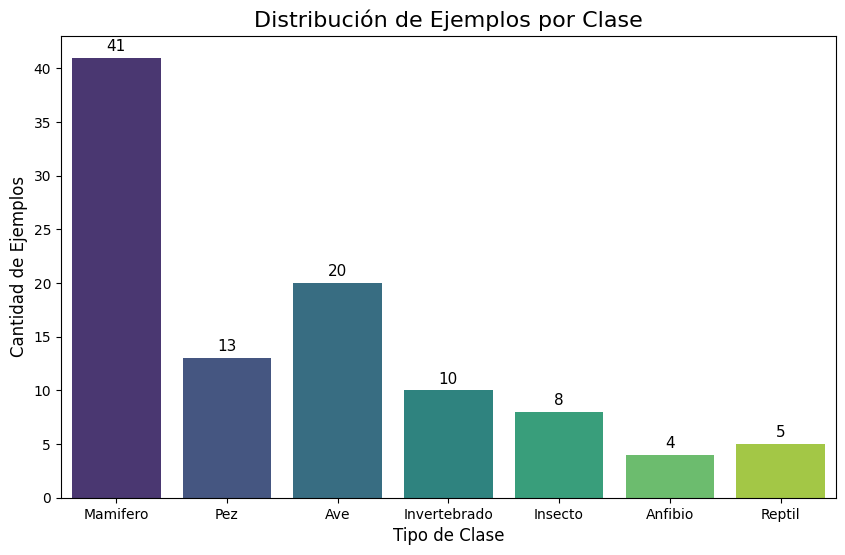

In [ ]:
import seaborn as sns


df = openFile('zoo.csv')


plt.figure(figsize=(10, 6)) # Tamaño del gráfico

# Usamos countplot que cuenta automáticamente
ax = sns.countplot(x='Clase', data=df, palette='viridis')

plt.title('Distribución de Ejemplos por Clase', fontsize=16)
plt.xlabel('Tipo de Clase', fontsize=12)
plt.ylabel('Cantidad de Ejemplos', fontsize=12)

# Agregar el número exacto encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Problemas que pueden sugir a partir de estos datos:
- 1. Sesgo hacia la clase 'Mamífero': Como la mayoría de los datos son de esta clase, el modelo aprenderá que estadísticamente le conviene predecir siempre la clase mayoritaria.
- 2. La Accuracy podría ser mentirosa: Podría tener 95% de Accuracy global pero 0% en las clases minoritarias.
- 3. Dificultad de aprendizaje: Con tan pocos ejemplos de algunas clases, el modelo no tendrá la suficiente información para generalizar correctamente.

In [ ]:
# Eliminamos la columna "Nombre" del DataFrame porque no es necesaria para el análisis
df = df.drop(columns=['animal'])

In [ ]:
X = df.drop(columns=["Clase"]).values
Y = (df["Clase"] == "Mamifero") * 1  # 1 Si es Mamifero, 0 en caso contrario

p = Perceptron(alpha=0.05, max_iter=100)
p.fit(X, Y)

Y_pred = p.predict(X)
aciertos = p.score(X, Y) * 100
print("%% de aciertos = %.2f %%" %(aciertos))


% de aciertos = 100.00 %
Pesos del perceptrón: None


In [74]:
# Observamos los pesos
print("Pesos del perceptrón:", p.coef_)

Pesos del perceptrón: [[ 5. -3. -4.  6. -2. -2. -1.  1.  0.  1. -2. -1.  0. -1.  3.  2.]]


Esto indica que las características más importantes so si "Tiene Pelo" y si es "Acuatico"

### Ejercicio 7

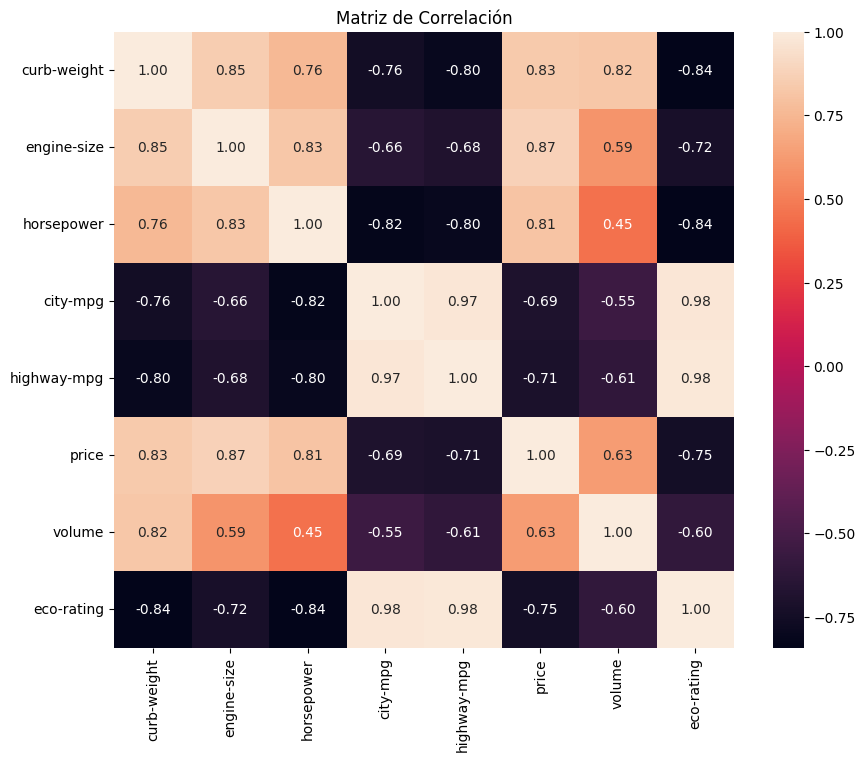

In [98]:
df = openFile('automobile-simple.csv')

df = df.dropna() # Eliminamos filas con datos nulos
# print(df.isnull().sum()) 

# Matriz de correlación
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[columnas_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [99]:
# Preprocesamiento de datos
df = df.drop(columns=["make"])
df["fuel-type"] = df["fuel-type"].map({'gas': 1, 'diesel': 0})
df["num-of-doors"] = df["num-of-doors"].map({'two': 2, 'four': 4})

dummies = pd.get_dummies(df["body-style"], prefix="body-style").astype(int)
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=["body-style"])

# Crear etiqueta binaria para coches ecológicos
media_ecologica = df["eco-rating"].mean()
df["ecological"] = (df["eco-rating"] >= media_ecologica)*1  # 1 si es ecológica, 0 en caso contrario
df = df.drop(columns=["eco-rating"])

X = df.drop(columns=["ecological"]).values
Y = df["ecological"].values

# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ppn = Perceptron(alpha=0.05, max_iter=200)
ppn.fit(X_scaled, Y)

Y_pred = ppn.predict(X_scaled)
aciertos = sum(Y == Y_pred) * 100
print("%% de aciertos = %.2f %%" %(aciertos/X.shape[0]))


% de aciertos = 99.49 %


In [105]:
df.columns

Index(['fuel-type', 'num-of-doors', 'curb-weight', 'engine-size', 'horsepower',
       'city-mpg', 'highway-mpg', 'price', 'volume', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'ecological'],
      dtype='object')

In [ ]:
X = df.drop(columns=["highway-mpg", "horsepower"]).values
Y = df["ecological"].values

# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ppn = Perceptron(alpha=0.05, max_iter=200)
ppn.fit(X_scaled, Y)

Y_pred = ppn.predict(X_scaled)
aciertos = sum(Y == Y_pred) * 100
print("%% de aciertos = %.2f %%" %(aciertos/X.shape[0]))


% de aciertos = 100.00 %


La eliminación de atributos fuertemente correlacionados redujo la multicolinealidad del dataset. Dado que variables como city-mpg y highway-mpg tienen una correlación de 0.97, contienen información redundante. Al simplificar el espacio de características, el Perceptrón pudo converger más eficientemente hacia una solución linealmente separable, eliminando el ruido que introducían las variables extra.